In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The below column reference:

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction


In [29]:
df = pd.read_csv(r"D:\INERNSHIP\online.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [30]:
df.shape

(6362620, 11)

In [31]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [32]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [35]:
df_dropNames = df.drop(['nameOrig','nameDest'], axis=1)
df_dropNames.nunique()

step                  743
type                    5
amount            5316900
oldbalanceOrg     1845844
newbalanceOrig    2682586
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [36]:
df_dropNames['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

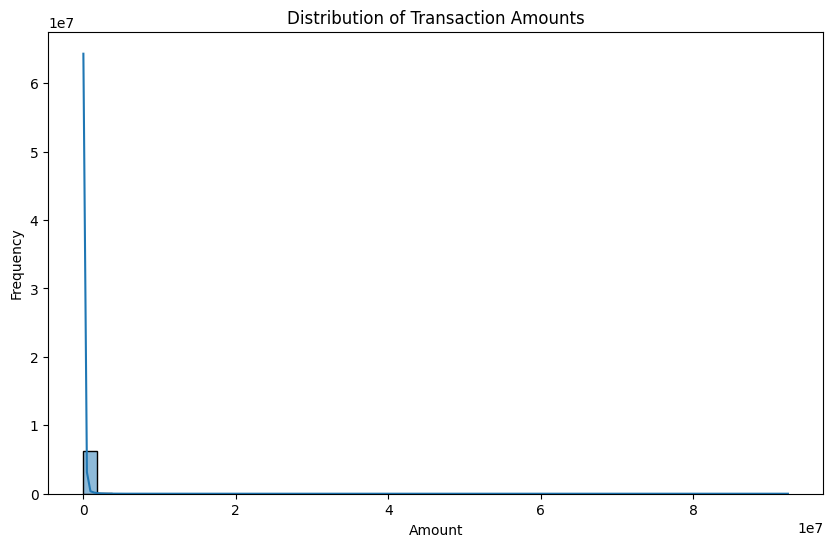

In [37]:
# Distribution of transaction amounts 
plt.figure(figsize=(10, 6)) 
sns.histplot(df['amount'], bins=50, kde=True) 
plt.title('Distribution of Transaction Amounts') 
plt.xlabel('Amount') 
plt.ylabel('Frequency') 
plt.show()

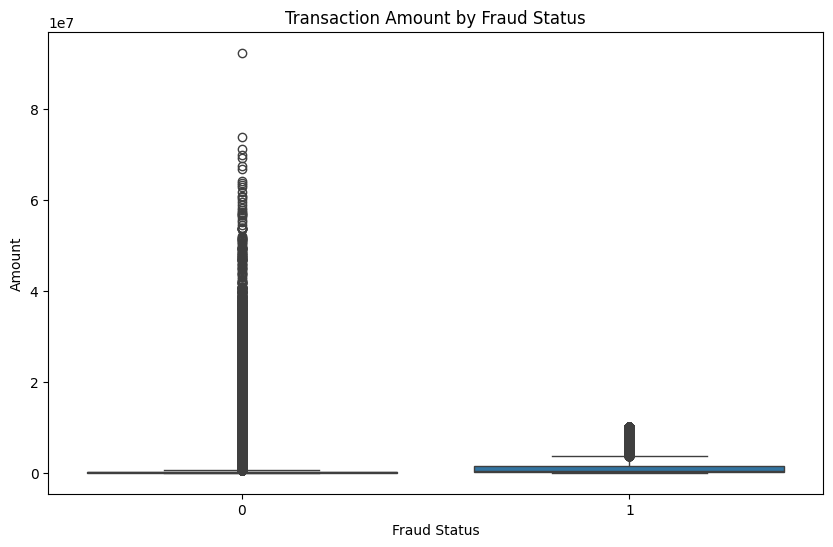

In [38]:
# Boxplot of transaction amount by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.show()

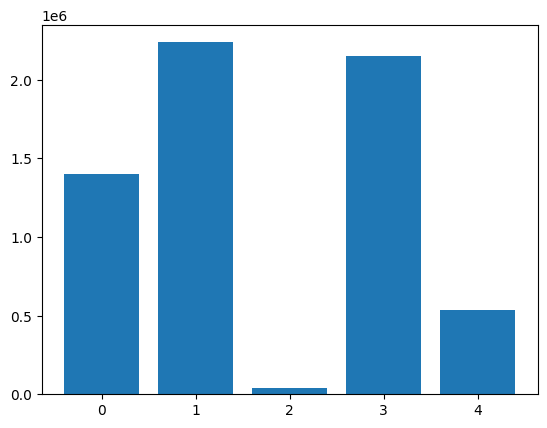

In [79]:
plt.bar(df_dropNames['type'].value_counts().index, df_dropNames['type'].value_counts().values)
plt.show()

In [40]:
import plotly.express as px
figure = px.pie(df_dropNames, 
             values=df_dropNames['type'].value_counts().values, 
             names=df_dropNames['type'].value_counts().index, 
             hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4944\220114900.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




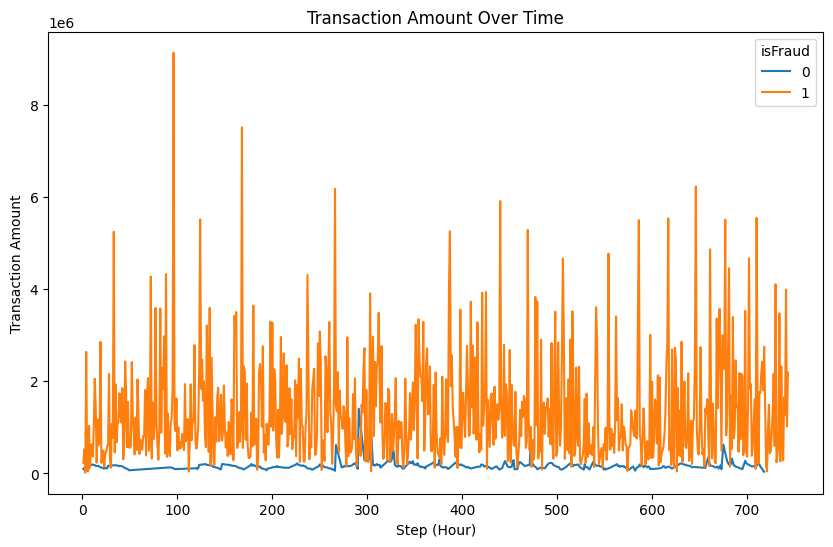

In [41]:
# Transaction count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='amount', hue='isFraud', data=df, ci=None)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Amount')
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dropNames["type"] = le.fit_transform(df_dropNames["type"])

In [43]:
le.classes_

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [44]:
df_dropNames.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


<Axes: >

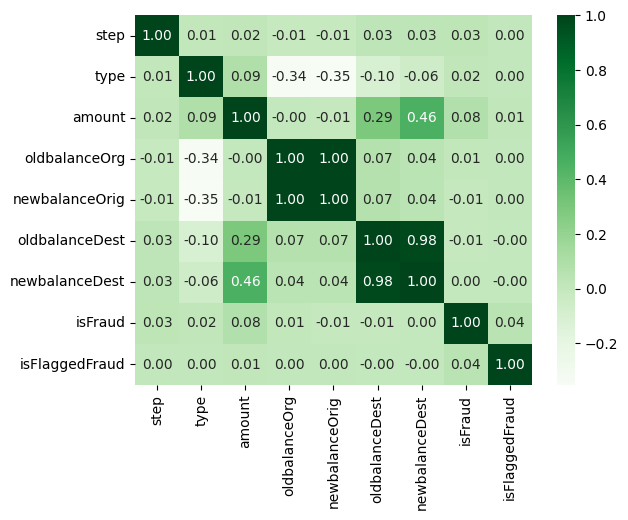

In [45]:
corr = df_dropNames.corr()
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [55]:
X = df_dropNames[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]                       
y = df_dropNames['isFraud']

In [67]:
X

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,9839.64,170136.00,160296.36
1,3,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,3,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [68]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [69]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig
6271196,0,386385.08,4669568.85,5055953.92
1888243,0,212458.78,234635.00,447093.78
5549957,3,19967.60,3634.00,0.00
2025342,1,527616.51,180216.00,0.00
682342,4,206067.85,0.00,0.00
...,...,...,...,...
1570006,0,129715.85,5054252.83,5183968.68
2234489,3,2459.70,0.00,0.00
4926484,1,10579.16,59279.00,48699.84
4304572,1,73020.76,20289.00,0.00


In [70]:
X_test

,type,amount,oldbalanceOrg,newbalanceOrig
3737323,0,330218.42,20866.00,351084.42
264914,3,11647.08,30370.00,18722.92
85647,0,152264.21,106589.00,258853.21
5899326,4,1551760.63,0.00,0.00
2544263,0,78172.30,2921331.58,2999503.88
...,...,...,...,...
2210524,3,917.99,9606.00,8688.01
956542,3,480.58,4683.00,4202.42
5474798,1,248511.67,507.00,0.00
878120,1,200008.65,0.00,0.00


In [71]:
y_train

6271196    0
1888243    0
5549957    0
2025342    0
682342     0
          ..
1570006    0
2234489    0
4926484    0
4304572    0
1692743    0
Name: isFraud, Length: 5090096, dtype: int64

In [72]:
y_test

3737323    0
264914     0
85647      0
5899326    0
2544263    0
          ..
2210524    0
956542     0
5474798    0
878120     0
1592828    0
Name: isFraud, Length: 1272524, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
y_train_pred = model.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.86      0.42      0.57      6593

    accuracy                           1.00   5090096
   macro avg       0.93      0.71      0.78   5090096
weighted avg       1.00      1.00      1.00   5090096



In [60]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9991599372585507

In [75]:
# Ensure feature names match those used during training
features = pd.DataFrame([[4,9000.60,8000.60,1.0]], columns=["type", "amount", "oldbalanceOrg", "newbalanceOrig"])
print(model.predict(features))

[0]
